<a href="https://colab.research.google.com/github/deltorobarba/finance/blob/main/var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Value at Risk (VaR)**

**Value at Risk (CVaR)**

Value at Risk estimates potential losses in a portfolio over a specified time period at a given confidence level.


Value at Risk (VaR) at 95.0% confidence level: 0.0153


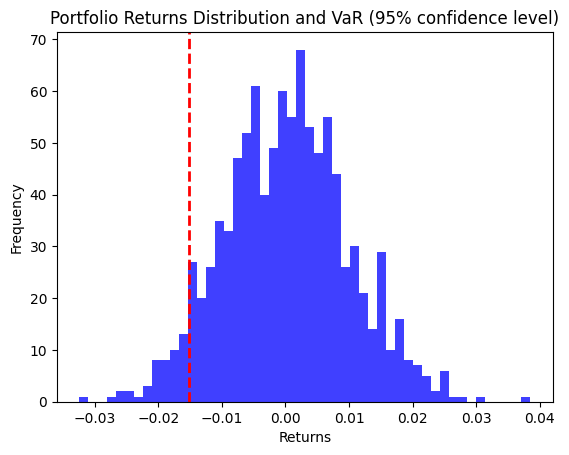

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample portfolio returns (e.g., daily returns)
np.random.seed(42)
portfolio_returns = np.random.normal(0, 0.01, 1000)  # Simulated daily returns

# Define the confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the VaR
def calculate_var(returns, confidence_level):
    """
    Calculate the Value at Risk (VaR) using historical simulation.

    Parameters:
    - returns: A numpy array or pandas series of portfolio returns.
    - confidence_level: The confidence level for VaR (e.g., 0.95 for 95% confidence).

    Returns:
    - VaR value
    """
    sorted_returns = np.sort(returns)  # Sort the returns
    var_index = int((1 - confidence_level) * len(sorted_returns))  # Get the VaR index
    var_value = -sorted_returns[var_index]  # VaR is the negative of the return at the VaR index

    return var_value

# Calculate VaR for 95% confidence level
var_95 = calculate_var(portfolio_returns, confidence_level)

print(f"Value at Risk (VaR) at {confidence_level * 100}% confidence level: {var_95:.4f}")

# Plot the returns with VaR
plt.hist(portfolio_returns, bins=50, alpha=0.75, color='blue')
plt.axvline(-var_95, color='red', linestyle='dashed', linewidth=2)
plt.title(f'Portfolio Returns Distribution and VaR (95% confidence level)')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

* Portfolio Returns: A series of daily portfolio returns is generated using a normal distribution (np.random.normal()).
* Confidence Level: The confidence level (e.g., 95%) is set, meaning that we expect the portfolio to lose more than the VaR amount only 5% of the time.
* VaR Calculation: The returns are sorted, and the VaR is calculated as the negative return at the quantile corresponding to the confidence level.

This is a basic implementation; more sophisticated methods like parametric or Monte Carlo approaches are also commonly used for VaR.

**Calculate Value at Risk (VaR) using a Monte Carlo simulation**

The idea behind Monte Carlo is to simulate many possible future returns of a portfolio based on a model (e.g., normal distribution), and then estimate VaR from the simulated distribution.

Monte Carlo Value at Risk (VaR) at 95.0% confidence level: $-450,676.82


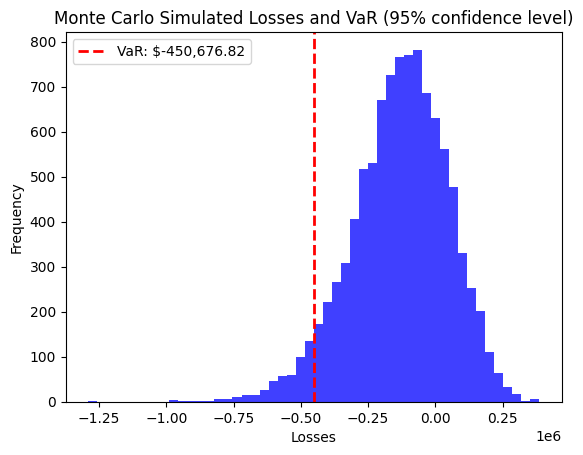

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the portfolio
initial_investment = 1000000  # Initial portfolio value (e.g., $1,000,000)
mean_return = 0.0005  # Expected daily return (0.05%)
volatility = 0.01  # Expected daily volatility (1%)
days = 252  # Number of days (typically 252 trading days in a year)
simulations = 10000  # Number of Monte Carlo simulations
confidence_level = 0.95  # Confidence level for VaR

# Monte Carlo simulation of portfolio returns
def monte_carlo_var(initial_investment, mean_return, volatility, days, simulations, confidence_level):
    # Simulate daily returns over the given number of days
    daily_returns = np.random.normal(mean_return, volatility, (simulations, days))

    # Simulate the cumulative return over the given period
    cumulative_returns = np.cumprod(1 + daily_returns, axis=1)

    # Portfolio value at the end of the simulation period
    portfolio_values = initial_investment * cumulative_returns[:, -1]

    # Calculate portfolio losses
    portfolio_losses = initial_investment - portfolio_values

    # Sort the losses
    sorted_losses = np.sort(portfolio_losses)

    # Calculate VaR based on the confidence level
    var_index = int((1 - confidence_level) * simulations)
    var_value = sorted_losses[var_index]

    return var_value, portfolio_losses

# Run Monte Carlo simulation and calculate VaR
var_mc, losses_mc = monte_carlo_var(initial_investment, mean_return, volatility, days, simulations, confidence_level)

print(f"Monte Carlo Value at Risk (VaR) at {confidence_level * 100}% confidence level: ${var_mc:,.2f}")

# Plot the distribution of simulated losses
plt.hist(losses_mc, bins=50, alpha=0.75, color='blue')
plt.axvline(var_mc, color='red', linestyle='dashed', linewidth=2, label=f'VaR: ${var_mc:,.2f}')
plt.title(f'Monte Carlo Simulated Losses and VaR (95% confidence level)')
plt.xlabel('Losses')
plt.ylabel('Frequency')
plt.legend()
plt.show()



1. **Parameters**:
   - `initial_investment`: The initial value of the portfolio (e.g., $1,000,000).
   - `mean_return`: The expected daily return (e.g., 0.05% per day).
   - `volatility`: The expected daily volatility (e.g., 1% per day).
   - `days`: The time horizon for the simulation (e.g., 252 days for 1 year).
   - `simulations`: The number of Monte Carlo simulations (e.g., 10,000).

2. **Monte Carlo Simulation**:
   - The portfolio returns are simulated daily for the given number of days using a normal distribution for the returns.
   - The cumulative returns are then calculated by multiplying daily returns across the period.
   - Portfolio losses are computed by subtracting the final portfolio value from the initial investment.

3. **VaR Calculation**:
   - The simulated losses are sorted, and the VaR is taken as the loss at the quantile corresponding to the confidence level.

4. **Visualization**:
   - The histogram shows the distribution of simulated losses, with the VaR threshold marked by a red dashed line.

This method provides a way to estimate potential losses in a more sophisticated manner by considering many potential future scenarios.

**Parametric (Variance-Covariance) VaR Approach**

A **parametric approach** to Value at Risk (VaR) assumes that the returns of the portfolio follow a specific probability distribution (often the normal distribution). Using this assumption, you can calculate VaR directly from the distribution's parameters: the mean (expected return) and standard deviation (volatility).

In the parametric approach, the formula for VaR under the assumption of normally distributed returns is:

$
\text{VaR} = \mu - z \cdot \sigma
$

Where:
- $\mu$ is the portfolio's mean return.
- $\sigma$ is the portfolio's standard deviation (volatility).
- $z$ is the z-score corresponding to the desired confidence level (e.g., for 95%, $z = 1.645$ for a one-tailed distribution).


In [4]:
import numpy as np
import scipy.stats as stats

# Parameters for the portfolio
initial_investment = 1000000  # Initial portfolio value (e.g., $1,000,000)
mean_return = 0.0005  # Expected daily return (0.05%)
volatility = 0.01  # Expected daily volatility (1%)
confidence_level = 0.95  # Confidence level for VaR
time_horizon = 1  # Time horizon in days (can be adjusted)

# Calculate the z-score for the confidence level (e.g., 95% confidence level)
z_score = stats.norm.ppf(1 - confidence_level)

# Calculate VaR using the parametric formula
def calculate_parametric_var(initial_investment, mean_return, volatility, z_score, time_horizon):
    # Adjust mean and volatility for the time horizon (e.g., multiple days)
    adjusted_mean = mean_return * time_horizon
    adjusted_volatility = volatility * np.sqrt(time_horizon)

    # Calculate VaR
    var_value = initial_investment * (adjusted_mean - z_score * adjusted_volatility)
    return -var_value  # Return positive value for potential loss

# Calculate parametric VaR
var_parametric = calculate_parametric_var(initial_investment, mean_return, volatility, z_score, time_horizon)

print(f"Parametric Value at Risk (VaR) at {confidence_level * 100}% confidence level: ${var_parametric:,.2f}")

Parametric Value at Risk (VaR) at 95.0% confidence level: $-16,948.54


1. **Parameters**:
   - `initial_investment`: The initial portfolio value.
   - `mean_return`: The expected daily return.
   - `volatility`: The daily standard deviation of returns (volatility).
   - `confidence_level`: The confidence level for VaR (e.g., 95%).
   - `time_horizon`: The number of days over which you want to calculate VaR (typically 1 day, but you can extend this to multiple days).

2. **z-Score Calculation**:
   - `stats.norm.ppf(1 - confidence_level)` is used to calculate the z-score (e.g., for 95% confidence, the z-score is approximately 1.645 for one-tailed VaR).

3. **Parametric VaR Calculation**:
   - Adjust the mean return and volatility for the time horizon. If calculating VaR for multiple days, the volatility is scaled by the square root of the time period.
   - Calculate VaR using the formula \(\text{VaR} = \mu - z \cdot \sigma\).

**Key Assumptions:**
- **Normally Distributed Returns**: The parametric method assumes that returns follow a normal distribution. In practice, financial returns often exhibit fat tails (heavy-tailed distributions), so this method may underestimate the risk during extreme events.
- **Linear Portfolios**: The parametric approach works best for portfolios where the relationship between returns and risk factors is linear. For non-linear portfolios (e.g., portfolios with options), more sophisticated techniques like Monte Carlo simulations are preferred.

**Output:** You will get a dollar amount representing the maximum expected loss at the given confidence level (e.g., 95%) over a specific time horizon (e.g., 1 day). This method is straightforward and efficient, making it popular for portfolios where the normality assumption is reasonable.